In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
#% matplotlib inline

Salary Data

In [ ]:
data=pd.read_csv('Salary_Data.csv')
data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [115]:
data.isnull().sum()

Delivery Time    0
Sorting Time     0
dtype: int64

In [ ]:
data.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


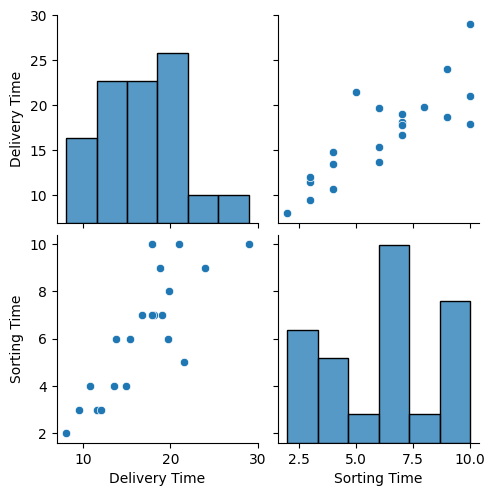

In [116]:
sns.pairplot(data)

<ipython-input-65-10b07b01fa97>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Salary'])


<Axes: xlabel='Salary', ylabel='Density'>

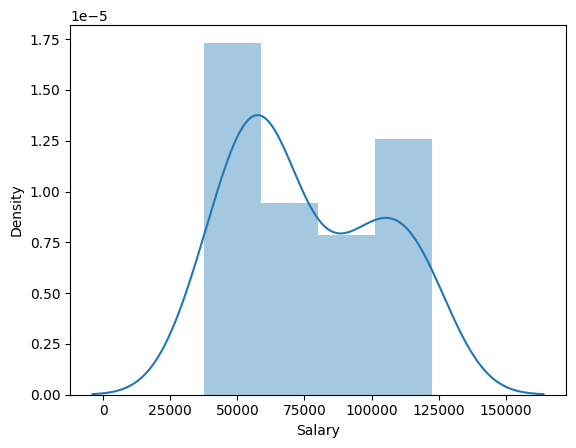

In [ ]:
sns.distplot(data['Salary'])

<ipython-input-79-f0f3c37637f8>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['YearsExperience'])


<Axes: xlabel='YearsExperience', ylabel='Density'>

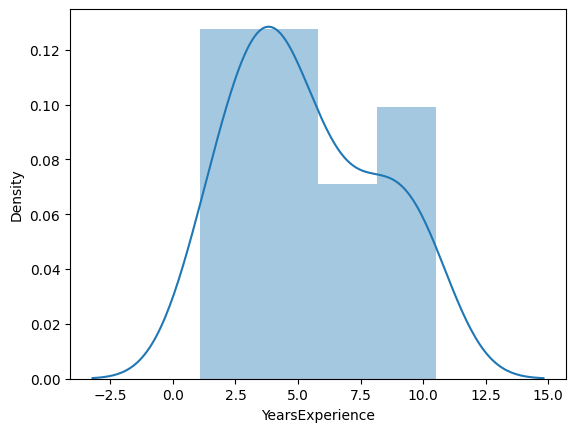

In [ ]:
sns.distplot(data['YearsExperience'])

Fitting a Linear Regression Model

In [ ]:
import statsmodels.formula.api as smf
model = smf.ols("Salary~YearsExperience",data = data).fit()

In [ ]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Wed, 10 May 2023   Prob (F-statistic):           1.14e-20
Time:                        16:17:24   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
YearsExperience  9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
# From summary output we can see Rsquare is "High" that is fitted model is good.
#p-value of YearsExperiance is siginificant, that is YearsExeprience is contributing to the regressionn model.

In [ ]:
model.params

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

In [ ]:
(model.rsquared,model.rsquared_adj)

(0.9569566641435086, 0.9554194021486339)

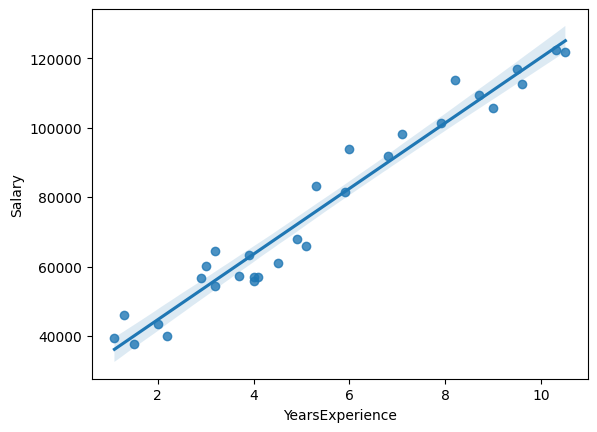

In [ ]:
sns.regplot(x="YearsExperience", y="Salary", data=data);

Prediction

In [ ]:
newdata=pd.Series([15,25,26,7,5,3])
data_pred=pd.DataFrame(newdata,columns=['YearsExperience'])
data_pred

,YearsExperience
0,15
1,25
2,26
3,7
4,5
5,3


In [ ]:
model.predict(data_pred) 

0    167541.635020
1    262041.258235
2    271491.220557
3     91941.936449
4     73042.011806
5     54142.087163
dtype: float64

Possible Transformations

In [ ]:
# Here weperforming Transformations becuase the density plot of Salray and Experience were bimodal.

In [ ]:
#Log transformtion
model1 = smf.ols("Salary~np.log(YearsExperience)",data = data).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     163.6
Date:                Wed, 10 May 2023   Prob (F-statistic):           3.25e-13
Time:                        16:18:05   Log-Likelihood:                -319.77
No. Observations:                  30   AIC:                             643.5
Df Residuals:                      28   BIC:                             646.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                1.493e+04   5156.226      2.895      0.007    4365.921    2.55e+04
np.log(YearsExperience)  4.058e+04   3172.453     12.792      0.000    3.41e+04    4.71e+04
==============================================================================
Omnibus:                        1.094   Durbin-Watson:                   0.512
Prob(Omnibus):                  0.579   Jarque-Bera (JB):                0.908
Skew:                           0.156   Prob(JB):                        0.635
Kurtosis:                       2.207   Cond. No.                         5.76
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<ipython-input-85-af2cf665d0d9>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X1)


<Axes: xlabel='YearsExperience', ylabel='Density'>

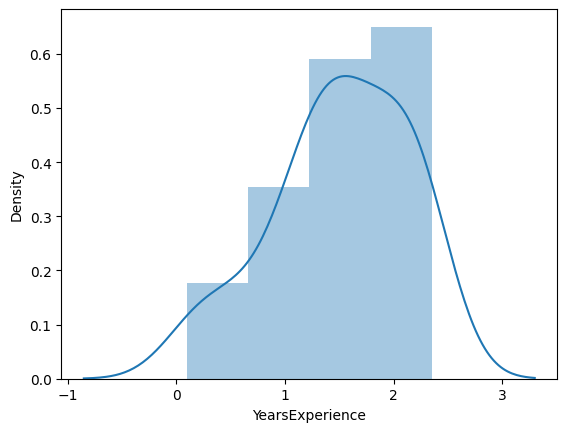

In [ ]:
X1=np.log(data['YearsExperience'])
sns.distplot(X1)

<Axes: xlabel='YearsExperience', ylabel='Salary'>

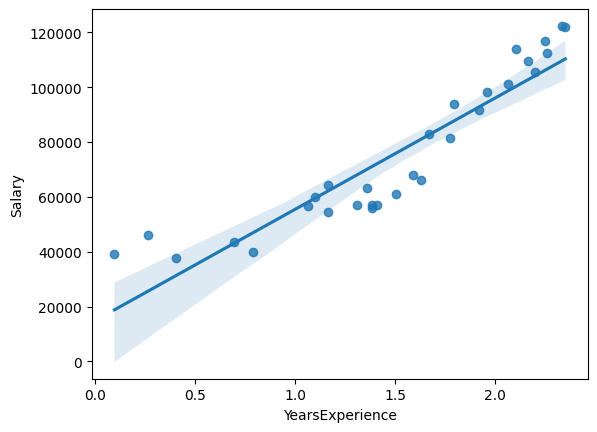

In [ ]:
sns.regplot(x=X1, y="Salary", data=data)

In [ ]:
r1=(model1.rsquared,model1.rsquared_adj)
r1

(0.8538888828756969, 0.8486706286926861)

In [ ]:
#Square transformation
model2 = smf.ols("Salary~np.square(YearsExperience)",data = data).fit()
model2.summary()  

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.915
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                     302.7
Date:                Wed, 10 May 2023   Prob (F-statistic):           1.52e-16
Time:                        16:23:07   Log-Likelihood:                -311.59
No. Observations:                  30   AIC:                             627.2
Df Residuals:                      28   BIC:                             630.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                   4.804e+04   2186.372     21.974      0.000    4.36e+04    5.25e+04
np.square(YearsExperience)   776.3188     44.624     17.397      0.000     684.911     867.726
==============================================================================
Omnibus:                        1.294   Durbin-Watson:                   0.883
Prob(Omnibus):                  0.524   Jarque-Bera (JB):                1.240
Skew:                           0.409   Prob(JB):                        0.538
Kurtosis:                       2.432   Cond. No.                         72.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<ipython-input-86-c1a05cc4951c>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X2)


<Axes: xlabel='YearsExperience', ylabel='Density'>

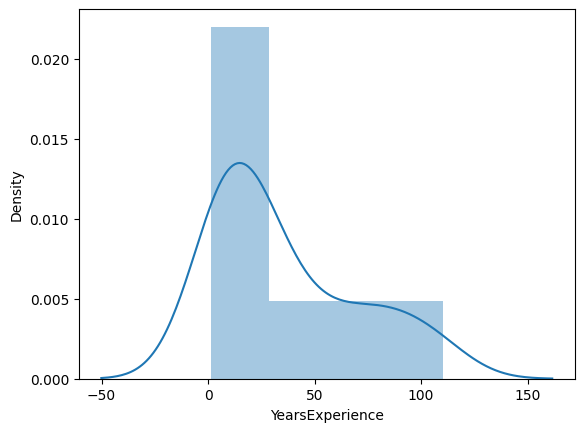

In [ ]:
X2=np.square(data['YearsExperience'])
sns.distplot(X2)

<Axes: xlabel='YearsExperience', ylabel='Salary'>

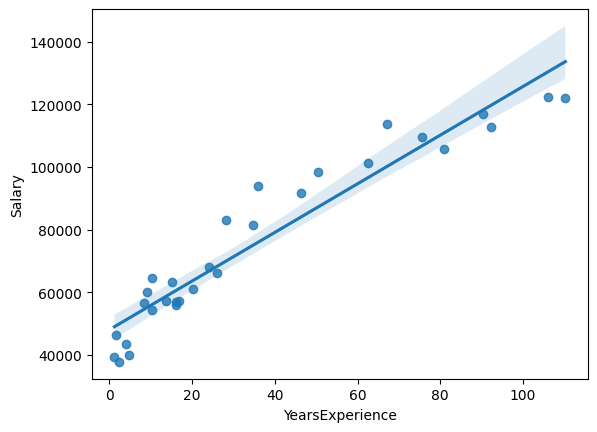

In [ ]:
sns.regplot(x=X2, y="Salary", data=data)

In [ ]:
r2=(model2.rsquared,model2.rsquared_adj)
r2

(0.9153198857852565, 0.9122955959918728)

In [ ]:
#Squareroot tranformation
model3 = smf.ols("Salary~np.sqrt(YearsExperience)",data = data).fit()   
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.931
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     377.8
Date:                Wed, 10 May 2023   Prob (F-statistic):           8.57e-18
Time:                        16:27:14   Log-Likelihood:                -308.52
No. Observations:                  30   AIC:                             621.0
Df Residuals:                      28   BIC:                             623.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                -1.606e+04   4921.599     -3.262      0.003   -2.61e+04   -5974.331
np.sqrt(YearsExperience)   4.15e+04   2135.122     19.437      0.000    3.71e+04    4.59e+04
==============================================================================
Omnibus:                        0.588   Durbin-Watson:                   1.031
Prob(Omnibus):                  0.745   Jarque-Bera (JB):                0.638
Skew:                           0.011   Prob(JB):                        0.727
Kurtosis:                       2.286   Cond. No.                         9.97
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<ipython-input-90-86e03b94cf3c>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X3)


<Axes: xlabel='YearsExperience', ylabel='Density'>

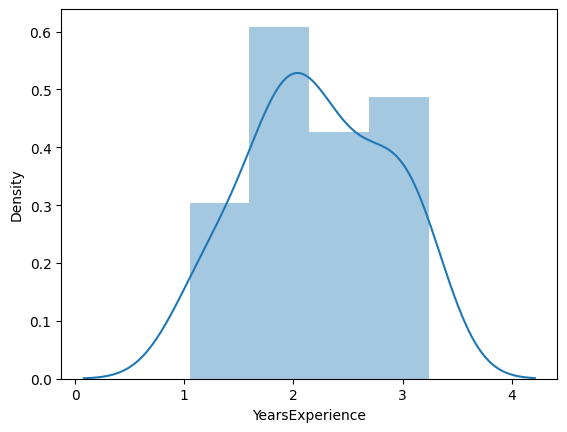

In [ ]:
X3=np.sqrt(data['YearsExperience'])
sns.distplot(X3)

<Axes: xlabel='YearsExperience', ylabel='Salary'>

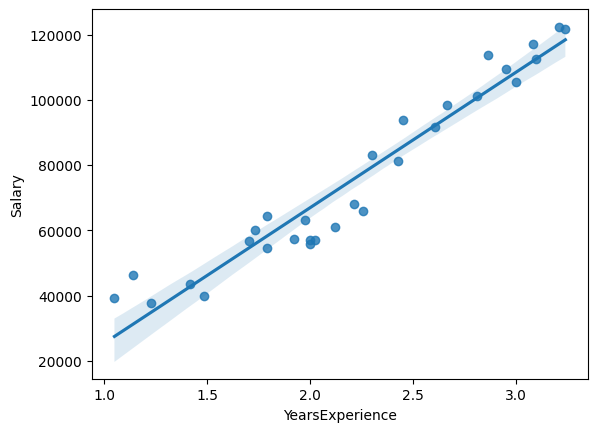

In [ ]:
sns.regplot(x=X3, y="Salary", data=data)

In [ ]:
r3=(model3.rsquared,model3.rsquared_adj)
r3

(0.9310009544993526, 0.9285367028743294)

In [ ]:
#model and model3 are best models as both models have larege R^2 and Adj R^2.

**Regression model from sklearn**

In [ ]:
#OR Different method
X=data.iloc[:, : -1].values
y=data.iloc[:,-1].values
from sklearn.linear_model import LinearRegression
regressor = LinearRegression().fit(X,y) 

In [ ]:
b0=regressor.intercept_
b1=regressor.coef_
print("b0 =",b0)
print("b1 =", b1)

b0 = 25792.200198668696
b1 = [9449.96232146]


In [ ]:
rsquare=regressor.score(X,y)
rsquare

0.9569566641435086

Visualization of originial model

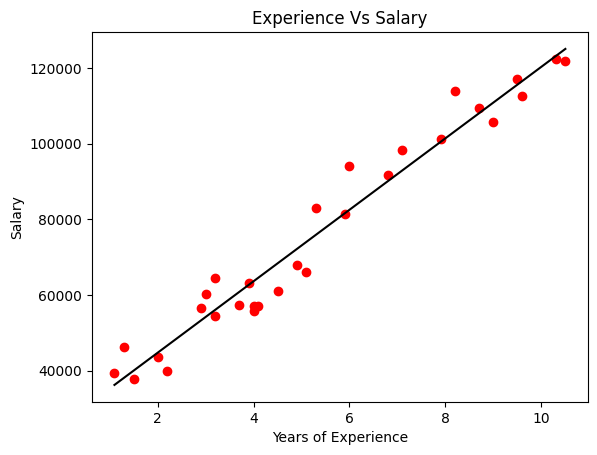

In [ ]:
plt.scatter(X, y, color= 'Red')
plt.plot(X, regressor.predict(X), color = 'Black')
plt.title('Experience Vs Salary')
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.show()

Prediction

In [ ]:
X1=np.array([[15],[25],[26],[7],[5],[3]])

In [ ]:
ypred=regressor.predict(X1)
print(ypred)

[167541.63502049 262041.25823505 271491.2205565   91941.93644885
  73042.01180594  54142.08716303]


# **Delivery Time**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [ ]:
data=pd.read_csv('delivery_time.csv')
data.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [ ]:
data1 =data.rename({'Delivery Time': 'Delivery_time'}, axis=1)
data2= data1.rename({'Sorting Time': 'Sorting_time'}, axis=1)

In [ ]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery_time  21 non-null     float64
 1   Sorting_time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [113]:
data2.isnull().sum()

Delivery_time    0
Sorting_time     0
dtype: int64

In [ ]:
data2.corr()

,Delivery_time,Sorting_time
Delivery_time,1.000000,0.825997
Sorting_time,0.825997,1.000000


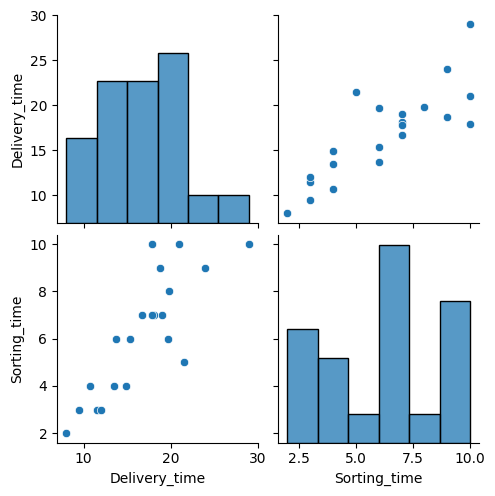

In [114]:
sns.pairplot(data2)

<ipython-input-104-c40a9428ad2b>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data2['Delivery_time'])


<Axes: xlabel='Delivery_time', ylabel='Density'>

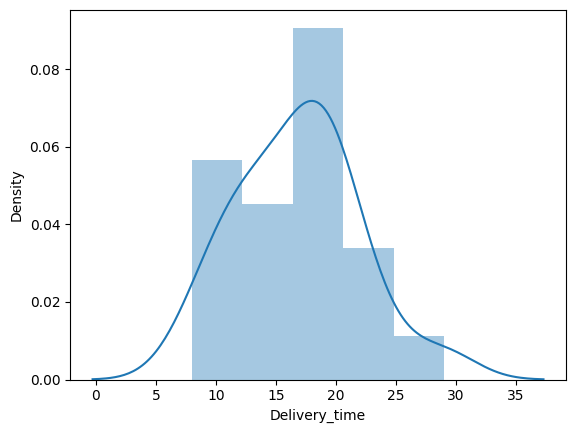

In [ ]:
sns.distplot(data2['Delivery_time'])

<ipython-input-105-aaff06c95c93>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data2['Sorting_time'])


<Axes: xlabel='Sorting_time', ylabel='Density'>

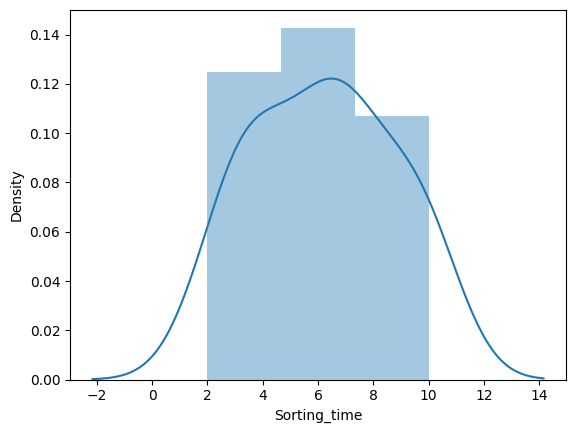

In [ ]:
sns.distplot(data2['Sorting_time'])

In [ ]:
import statsmodels.formula.api as smf
model = smf.ols("Delivery_time~ Sorting_time",data = data2).fit()

In [ ]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Delivery_time   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Wed, 10 May 2023   Prob (F-statistic):           3.98e-06
Time:                        16:32:20   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        6.5827      1.722      3.823      0.001       2.979      10.186
Sorting_time     1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
# From summary output we can see Rsquare is "Moderate" that is fitted model is good.
#p-value of Sortingtime is siginificant, that is, Sortingtime is contributing to the regressionn model.

In [ ]:
model.params

Intercept       6.582734
Sorting_time    1.649020
dtype: float64

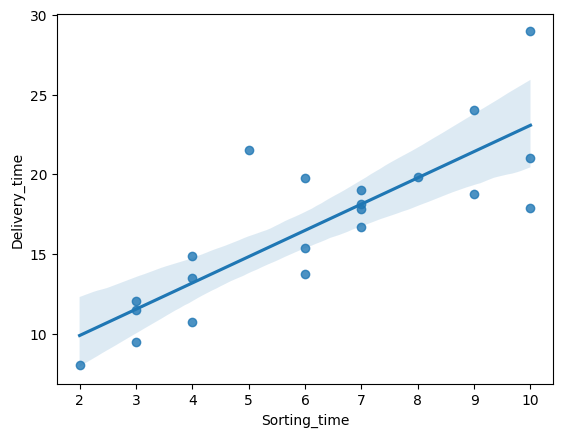

In [ ]:
sns.regplot(x="Sorting_time", y="Delivery_time", data=data2);

In [ ]:
print(model.tvalues, '\n', model.pvalues)  

Intercept       3.823349
Sorting_time    6.387447
dtype: float64 
 Intercept       0.001147
Sorting_time    0.000004
dtype: float64


In [ ]:
newdata=pd.Series([7,12])
data_pred=pd.DataFrame(newdata,columns=['Sorting_time'])
model.predict(data_pred) 

0    18.125873
1    26.370973
dtype: float64